### Importing libraries

In [4]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub
import numpy as np
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import json
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/MachineLearningProject")

Mounted at /content/drive


### Loading data set

In [ ]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/train",
                                                               label_mode="binary",
                                                               color_mode="rgb",
                                                               batch_size=32,
                                                               image_size=(64, 64),
                                                               shuffle=True,
                                                               seed=42,
                                                               subset="both",
                                                               validation_split=0.25)

test_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/test",
                                                      label_mode="binary",
                                                      color_mode="rgb",
                                                      batch_size=32,
                                                      image_size=(64, 64),
                                                      shuffle=True,
                                                      seed=42)

Found 4743 files belonging to 2 classes.
Using 3558 files for training.
Using 1185 files for validation.
Found 1184 files belonging to 2 classes.


### Data Preprocessing Pipeline

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal"),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization)
])

### Sequential Models

In [ ]:
model_1 = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", input_shape=(64, 64, 3)),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Flatten(),

    Dense(1,
          activation="sigmoid",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros")
])

In [ ]:
model_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

print(model_1.summary())

history_1 = model_1.fit(train_ds,
                        epochs=50,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_4 (RandomFlip)  (None, 64, 64, 3)         0         
                                                                 
 random_contrast_4 (RandomC  (None, 64, 64, 3)         0         
 ontrast)                                                        
                                                                 
 lambda_4 (Lambda)           (None, 64, 64, 3)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 31, 31, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 29, 29, 10)       

In [ ]:
model_2 = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", input_shape=(64, 64, 3)),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Flatten(),

    Dense(1,
          activation="sigmoid",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros")
])

In [ ]:
early_stopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, verbose=1)

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

print(model_2.summary())

history_2 = model_2.fit(train_ds,
                        epochs=50,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds),
                        callbacks=[early_stopper])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_5 (RandomFlip)  (None, 64, 64, 3)         0         
                                                                 
 random_contrast_5 (RandomC  (None, 64, 64, 3)         0         
 ontrast)                                                        
                                                                 
 lambda_5 (Lambda)           (None, 64, 64, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (None, 62, 62, 10)        280       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 31, 31, 10)        0         
 ng2D)                                                           
                                                                 
 batch_normalization (Batch  (None, 31, 31, 10)       

In [ ]:
model_3 = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", input_shape=(256, 256, 3)),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

        Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

        Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

        Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    tf.keras.layers.BatchNormalization(),

    Flatten(),

    Dense(1,
          activation="sigmoid",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros")
])

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/train",
                                                               label_mode="binary",
                                                               color_mode="rgb",
                                                               batch_size=32,
                                                               image_size=(256, 256),
                                                               shuffle=True)

test_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/test",
                                                      label_mode="binary",
                                                      color_mode="rgb",
                                                      batch_size=32,
                                                      image_size=(256, 256),
                                                      shuffle=True,
                                                      seed=42)

Found 4743 files belonging to 2 classes.
Found 1184 files belonging to 2 classes.


In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

print(model_3.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_8 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_contrast_8 (RandomC  (None, 256, 256, 3)       0         
 ontrast)                                                        
                                                                 
 lambda_8 (Lambda)           (None, 256, 256, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 254, 254, 10)      280       
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 127, 127, 10)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_15 (Ba  (None, 127, 127, 10)     

In [ ]:
history_2 = model_2.fit(train_ds,
                        epochs=50,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds),
                        callbacks=[early_stopper])

### VGG Models

In [ ]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/train",
                                                               label_mode="binary",
                                                               color_mode="rgb",
                                                               batch_size=32,
                                                               image_size=(224, 224),
                                                               shuffle=True,
                                                               seed=42,
                                                               subset="both",
                                                               validation_split=0.25)

test_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/test",
                                                      label_mode="binary",
                                                      color_mode="rgb",
                                                      batch_size=32,
                                                      image_size=(224, 224),
                                                      shuffle=True,
                                                      seed=42)

Found 4743 files belonging to 2 classes.
Using 3558 files for training.
Using 1185 files for validation.
Found 1184 files belonging to 2 classes.


In [ ]:
vgg_1 = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization),

    Conv2D(filters=16,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

        Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Flatten(),

    Dense(units=8,
          activation="relu",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros"),

    Dense(units= 1,
          activation="sigmoid",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros")
])

In [ ]:
vgg_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_contrast (RandomCon  (None, 224, 224, 3)       0         
 trast)                                                          
                                                                 
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4

In [ ]:
vgg_1.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


history_vgg_1 = vgg_1.fit(train_ds,
                        epochs=50,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Epoch 1/50
112/112 [==============================] - 680s 5s/step - loss: 0.5349 - accuracy: 0.7355 - val_loss: 0.4467 - val_accuracy: 0.7922
Epoch 2/50
112/112 [==============================] - 22s 189ms/step - loss: 0.3975 - accuracy: 0.8288 - val_loss: 0.3753 - val_accuracy: 0.8269
Epoch 3/50
112/112 [==============================] - 23s 192ms/step - loss: 0.3162 - accuracy: 0.8710 - val_loss: 0.3128 - val_accuracy: 0.8666
Epoch 4/50
112/112 [==============================] - 23s 201ms/step - loss: 0.2832 - accuracy: 0.8763 - val_loss: 0.2649 - val_accuracy: 0.8910
Epoch 5/50
112/112 [==============================] - 22s 189ms/step - loss: 0.2149 - accuracy: 0.9109 - val_loss: 0.2530 - val_accuracy: 0.8953
Epoch 6/50
112/112 [==============================] - 24s 200ms/step - loss: 0.1867 - accuracy: 0.9252 - val_loss: 0.2787 - val_accuracy: 0.8809
Epoch 7/50
112/112 [==============================] - 23s 200ms/step - loss: 0.1600 - accuracy: 0.9354 - val_loss: 0.3580 - val_accu

#### VGG 2

In [ ]:
vgg_2 = Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", input_shape=(224, 224, 3)),
    tf.keras.layers.RandomContrast(factor=0.3),
    tf.keras.layers.Lambda(function=tf.image.per_image_standardization),

    Conv2D(filters=16,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=16,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=32,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=64,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    Conv2D(filters=128,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding="same",
           activation="relu",
           kernel_initializer="glorot_normal"),

    MaxPool2D(pool_size=(2, 2),
              strides=None,
              padding="valid"),

    Flatten(),

    Dense(units=16,
          activation="relu",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros"),

    Dense(units=8,
          activation="relu",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros"),

    Dense(units= 1,
          activation="sigmoid",
          kernel_initializer="glorot_normal",
          bias_initializer="zeros")
])

In [ ]:
vgg_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 224, 224, 3)       0         
                                                                 
 random_contrast_2 (RandomC  (None, 224, 224, 3)       0         
 ontrast)                                                        
                                                                 
 lambda_2 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 16)      448       
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 16)      2320      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                 

In [9]:
vgg_2.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


history_vgg_2 = vgg_2.fit(train_ds,
                        epochs=50,
                        steps_per_epoch=len(train_ds),
                        validation_data=test_ds,
                        validation_steps=len(test_ds))

Epoch 1/50
112/112 [==============================] - 40s 206ms/step - loss: 0.6171 - accuracy: 0.6563 - val_loss: 0.4419 - val_accuracy: 0.8218
Epoch 2/50
112/112 [==============================] - 25s 214ms/step - loss: 0.4041 - accuracy: 0.8328 - val_loss: 0.3768 - val_accuracy: 0.8632
Epoch 3/50
112/112 [==============================] - 25s 218ms/step - loss: 0.3543 - accuracy: 0.8612 - val_loss: 0.3714 - val_accuracy: 0.8598
Epoch 4/50
112/112 [==============================] - 25s 219ms/step - loss: 0.3285 - accuracy: 0.8654 - val_loss: 0.3150 - val_accuracy: 0.8615
Epoch 5/50
112/112 [==============================] - 25s 215ms/step - loss: 0.3161 - accuracy: 0.8730 - val_loss: 0.2940 - val_accuracy: 0.8860
Epoch 6/50
112/112 [==============================] - 24s 209ms/step - loss: 0.2907 - accuracy: 0.8828 - val_loss: 0.3127 - val_accuracy: 0.8733
Epoch 7/50
112/112 [==============================] - 25s 213ms/step - loss: 0.2734 - accuracy: 0.8870 - val_loss: 0.2741 - val_ac

In [10]:
def plot_metrics(history, figsize=(10, 5)):
    """
    Plots the loss and accuracy curves from a history dictionary.
    :param history: Dict. of the history of a tensorflow model
    :param figsize: Tuple of the figure size
    :return: None
    """
    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=2)

    loss = history["loss"]
    val_loss = history["val_loss"]

    accuracy = history["accuracy"]
    val_accuracy = history["val_accuracy"]

    epochs = range(1, 1 + len(history["loss"]))

    # Plot loss
    ax[0].plot(epochs, loss, label="Training Loss", linewidth=2, color="#0291b5")
    ax[0].plot(epochs, val_loss, label="Validation Loss", linewidth=2, color="#eb0076")
    ax[0].set_title("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].legend()

    # Plot accuracy
    ax[1].plot(epochs, accuracy, label="Training Accuracy", linewidth=2, color="#0291b5")
    ax[1].plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=2, color="#eb0076")
    ax[1].set_title("Accuracy")
    ax[1].set_xlabel("Epochs")
    ax[1].legend()

    plt.show()

In [11]:
dict_1 = dict(history_vgg_1.history)

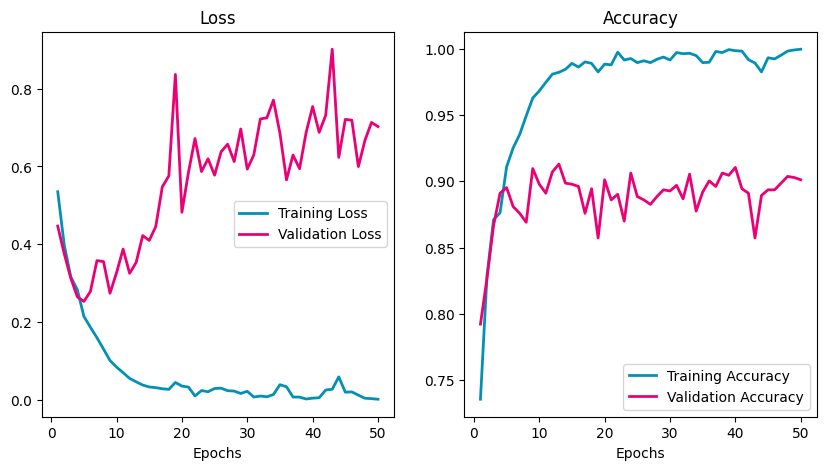

In [15]:
plot_metrics(dict_1)

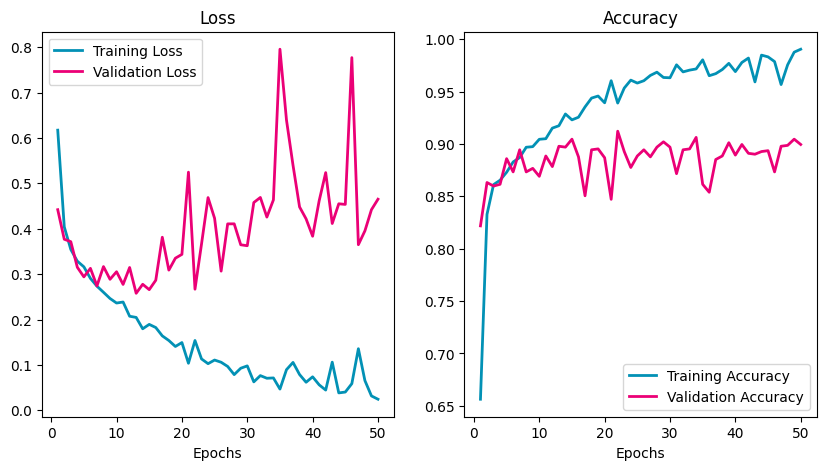

In [16]:
dict_2 = dict(history_vgg_2.history)
plot_metrics(dict_2)

## Transfer Learning


### Resnet

In [ ]:
resnet_model = Sequential([
    tf.keras.layers.Lambda(preprocess_input, input_shape=(64, 64, 3)),
    ResNet50(include_top=False, pooling="avg", weights="imagenet", input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

resnet_model.layers[1].trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
resnet_v2 = tf.keras.Sequential([
    tf.keras.layers.Lambda(tf.keras.applications.resnet_v2.preprocess_input, input_shape=(64, 64, 3)),
    tf.keras.applications.resnet_v2.ResNet50V2(include_top=False, weights="imagenet", input_shape=(64, 64, 3),  pooling="avg"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

resnet_v2.layers[1].trainable = False

In [ ]:
resnet_v2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 64, 64, 3)         0         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_9 (Lambda)           (None, 64, 64, 3)         0         
                                                                 
 keras_layer_6 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_9 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23566849 (89.90 MB)
Trainable params: 2049 (8.00 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


In [ ]:
resnet_v2.compile(optimizer="Adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

In [ ]:
resnet_v2.fit(train_ds,
                 epochs=10,
                 steps_per_epoch=len(train_ds),
                 validation_data=test_ds,
                 validation_steps=len(test_ds))

Epoch 1/10
112/112 [==============================] - 26s 176ms/step - loss: 0.3600 - accuracy: 0.8648 - val_loss: 0.2706 - val_accuracy: 0.8953
Epoch 2/10
112/112 [==============================] - 20s 168ms/step - loss: 0.2008 - accuracy: 0.9295 - val_loss: 0.2486 - val_accuracy: 0.9062
Epoch 3/10
112/112 [==============================] - 20s 163ms/step - loss: 0.1614 - accuracy: 0.9382 - val_loss: 0.2360 - val_accuracy: 0.9088
Epoch 4/10
112/112 [==============================] - 19s 162ms/step - loss: 0.1340 - accuracy: 0.9519 - val_loss: 0.2320 - val_accuracy: 0.9155
Epoch 5/10
112/112 [==============================] - 21s 177ms/step - loss: 0.1148 - accuracy: 0.9584 - val_loss: 0.2335 - val_accuracy: 0.9164
Epoch 6/10
112/112 [==============================] - 19s 163ms/step - loss: 0.1028 - accuracy: 0.9666 - val_loss: 0.2322 - val_accuracy: 0.9181
Epoch 7/10
112/112 [==============================] - 20s 168ms/step - loss: 0.0929 - accuracy: 0.9663 - val_loss: 0.2372 - val_ac

In [ ]:
resnet_v2.evaluate(test_ds)

37/37 [==============================] - 5s 99ms/step - loss: 0.2433 - accuracy: 0.9155


[0.24325056374073029, 0.9155405163764954]

### Efficientnet B0

In [ ]:
efficientnetb0 = tf.keras.Sequential([
    tf.keras.layers.Lambda(tf.keras.applications.efficientnet.preprocess_input, input_shape=(64, 64, 3)),
    tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, weights="imagenet", input_shape=(64, 64, 3),  pooling="avg"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

efficientnetb0.layers[1].trainable = False

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
efficientnetb0.compile(optimizer="Adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

In [ ]:
efficientnetb0.fit(train_ds,
                 epochs=10,
                 steps_per_epoch=len(train_ds),
                 validation_data=test_ds,
                 validation_steps=len(test_ds))

Epoch 1/10
112/112 [==============================] - 29s 189ms/step - loss: 0.3504 - accuracy: 0.8626 - val_loss: 0.2155 - val_accuracy: 0.9181
Epoch 2/10
112/112 [==============================] - 19s 166ms/step - loss: 0.1883 - accuracy: 0.9365 - val_loss: 0.1708 - val_accuracy: 0.9299
Epoch 3/10
112/112 [==============================] - 19s 157ms/step - loss: 0.1600 - accuracy: 0.9435 - val_loss: 0.1562 - val_accuracy: 0.9316
Epoch 4/10
112/112 [==============================] - 19s 158ms/step - loss: 0.1460 - accuracy: 0.9486 - val_loss: 0.1471 - val_accuracy: 0.9333
Epoch 5/10
112/112 [==============================] - 20s 169ms/step - loss: 0.1310 - accuracy: 0.9542 - val_loss: 0.1418 - val_accuracy: 0.9350
Epoch 6/10
112/112 [==============================] - 24s 211ms/step - loss: 0.1233 - accuracy: 0.9581 - val_loss: 0.1387 - val_accuracy: 0.9316
Epoch 7/10
112/112 [==============================] - 19s 160ms/step - loss: 0.1181 - accuracy: 0.9604 - val_loss: 0.1352 - val_ac

In [ ]:
efficientnetb0.evaluate(test_ds)

37/37 [==============================] - 5s 98ms/step - loss: 0.1303 - accuracy: 0.9392


[0.1302599012851715, 0.9391891956329346]

## ResNet Manually

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *

class ResNetBlock(Layer):

  def __init__(self, out_channels, first_stride=1):
    super().__init__()

    first_padding = 'same'
    if first_stride != 1:
      first_padding = 'valid'

    self.conv_sequence = Sequential([
                            Conv2D(out_channels, 3,
                                   first_stride, padding=first_padding),
                            BatchNormalization(),
                            ReLU(),

                            Conv2D(out_channels, 3,
                                   1, padding='same'),
                            BatchNormalization(),
                            ReLU()
    ])

  def call(self, inputs):
    x = self.conv_sequence(inputs)

    if x.shape == inputs.shape:
      x = x + inputs
    return x

layer = ResNetBlock(4)
print(layer)

In [12]:
class ResNet(Model):
  def __init__(self):
    super(ResNet, self).__init__()

    self.conv_1 = Sequential([Conv2D(64, 7, 2),
                              ReLU(),
                              MaxPooling2D(3, 2)
                  ])

    self.resnet_chains = Sequential([ResNetBlock(32), ResNetBlock(32)] +
                                    [ResNetBlock(64, 2), ResNetBlock(64)] +
                                    [ResNetBlock(128, 2), ResNetBlock(128)] +
                                    [ResNetBlock(256, 2), ResNetBlock(256)])

    self.out = Sequential([GlobalAveragePooling2D(),
                           Dense(1, activation='sigmoid')
    ])

  def call(self, x):
    x = self.conv_1(x)
    x = self.resnet_chains(x)
    x = self.out(x)
    return x

model = ResNet()
print(model)

In [5]:
train_ds, val_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/train",
                                                               label_mode="binary",
                                                               color_mode="rgb",
                                                               batch_size=32,
                                                               image_size=(256, 256),
                                                               shuffle=True,
                                                               seed=42,
                                                               subset="both",
                                                               validation_split=0.25)

test_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MachineLearningProject/data/test",
                                                      label_mode="binary",
                                                      color_mode="rgb",
                                                      batch_size=32,
                                                      image_size=(256, 256),
                                                      shuffle=True,
                                                      seed=42)

Found 4743 files belonging to 2 classes.
Using 3558 files for training.
Using 1185 files for validation.
Found 1184 files belonging to 2 classes.


In [13]:
for (img, label) in train_ds:
  print(model(img).numpy().shape, label.numpy())
  break

(32, 1) [[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [14]:
print(model.summary())

Model: "res_net_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_23 (Sequential)  (32, 62, 62, 64)          9472      
                                                                 
 sequential_32 (Sequential)  (32, 6, 6, 256)           2765184   
                                                                 
 sequential_33 (Sequential)  (32, 1)                   257       
                                                                 
Total params: 2774913 (10.59 MB)
Trainable params: 2771073 (10.57 MB)
Non-trainable params: 3840 (15.00 KB)
_________________________________________________________________
None


In [16]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import BinaryCrossentropy

# Learning rate is also a hyperparameter
model.compile(optimizer=SGD(learning_rate=0.001),
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

In [17]:
model.fit(train_ds,
          epochs=50,
          steps_per_epoch=len(train_ds),
          validation_data=test_ds,
          validation_steps=len(test_ds))

Epoch 1/50
112/112 [==============================] - 549s 5s/step - loss: 0.5323 - accuracy: 0.7788 - val_loss: 1.9142 - val_accuracy: 0.4983
Epoch 2/50
112/112 [==============================] - 24s 199ms/step - loss: 0.3694 - accuracy: 0.8471 - val_loss: 0.7841 - val_accuracy: 0.6976
Epoch 3/50
112/112 [==============================] - 24s 207ms/step - loss: 0.3181 - accuracy: 0.8746 - val_loss: 3.2907 - val_accuracy: 0.5405
Epoch 4/50
112/112 [==============================] - 28s 240ms/step - loss: 0.2992 - accuracy: 0.8808 - val_loss: 2.5517 - val_accuracy: 0.5397
Epoch 5/50
112/112 [==============================] - 24s 208ms/step - loss: 0.3245 - accuracy: 0.8637 - val_loss: 2.0664 - val_accuracy: 0.5405
Epoch 6/50
112/112 [==============================] - 24s 207ms/step - loss: 0.2710 - accuracy: 0.8994 - val_loss: 1.6414 - val_accuracy: 0.5954
Epoch 7/50
112/112 [==============================] - 28s 242ms/step - loss: 0.2351 - accuracy: 0.9056 - val_loss: 0.9602 - val_accu